# 強化学習法

## 基本的な事柄



この章では強化学習法を紹介します．中でも Q 学習と呼ばれる方法を紹介します．その後，深層学習法を利用して Q 学習を実行する深層 Q 学習の紹介をします．この節ではそれらを理解するために必要な基礎知識の説明をします．

### 強化学習法とは

機械学習法は大きく分けて，教師あり学習法，教師なし学習法，強化学習法の 3 個に分類されます．教師あり学習法は入力データとそれに紐づいた教師データからなるデータを利用して，入力データに対して教師データに応じた出力をするように人工知能（機械学習モデル）を成長させるものです．強化学習法で成長させる人工知能は特にはエージェントと呼びます．強化学習法をする際の登場人物は環境とエージェントのふたつです．エージェントが何らかの根拠に基づいて環境に作用します．例えば，ゲームで言うところの環境とはマップであったり空間であったり，そこに存在するキャラクターであったりしますが，それに作用するとは，プレイヤーの分身であるキャラクターを空間上で動かすこと等に相当します．このエージェントによる行動決定の根拠を方策と言います．強化学習法ではエージェントを成長させますが，これに与えるものは入力データと教師データの組み合わせではありません．エージェントは行動を選択した際のその行動の良さの指標である報酬という値を獲得します．エージェントは自身の行動に基づいてこの報酬を得ますが，環境の遷移が終わったとき（ゲームをクリアしたときや対戦の決着がついたとき）の報酬を最大化するように成長させられます．




```{note}
環境は遷移します．例えば，囲碁というゲームでは碁をプレイヤーが動かす度に盤面が変化しますが，この盤面が別の盤面に変化することを環境の遷移と言います．
```

### 用語の整理

強化学習法では教師あり学習法や教師なし学習法では用いない用語を利用するため，それについての整理を行います．

**エージェント**とは強化学習法で成長させられる人工知能です．以下で紹介する Q 学習において成長させられるものは Q テーブルというものであるため厳密には違うのですが，エージェントはそれを参照して行動を決定するため，このように書きました．

**環境**とはエージェントが作用を及ぼす対象です．囲碁でいうところの盤面と碁が環境です．任天堂のマリオを動かすゲームでいうところのフィールドやマリオ等が環境です．この環境はエージェントが選択した行動によって遷移をします．

**報酬**とはエージェントを成長させるために与える得点です．何かの行動を選択した際に，その行動が良かったなら報酬をエージェントに与えます．エージェントは獲得できる報酬の和を最大化するように成長します．ただし，この行動に対して得られた報酬を即時的に処理してエージェントが成長するわけではありません．以下の価値関数のところで記述しますが，この報酬を長期的に獲得し続けた結果の価値という値を指標にしてエージェントは成長させられます．

**価値**とはエージェントが獲得する報酬の和です．報酬と価値は似て非なるものです．報酬はエージェントが何らかの行動を選択したときに即時的に得られる値ですが，価値は得られる報酬の期待値です．

**価値関数**とはその他の機械学習法でいうところの評価関数です．価値関数はさらに状態価値関数と行動価値関数というものに細分化されます．状態価値関数とはある方策のもとにおいて，ある状態であった場合に将来的にもらえる価値（報酬の和）を出力する関数です．一方で，行動価値関数とは，ある方策のもとである状態であった場合にある行動を選択したときにもらえる価値を出力する関数です．これは以下の節で紹介する Q 学習において Q 値と呼ばれる値です．

**方策**とはエージェントが行動を選択するために利用するルールです．意思決定則です．これに基づいてエージェントは行動を決定します．以下の項で紹介する方策ベース法では方策関数というものを利用しますが，これは現在の環境の状態を入力として行動（または行動の確率）を出力する関数です．

**エピソード**とはエージェントが環境に作用し環境の遷移が何らかの停止条件に到達し終了するまでの時間の単位です．エピソードの中において環境が遷移する時間の単位はステップとかサイクルと言います．全ステップが1エピソードということです．

**割引率**とは $\gamma$ で表される値です．エピソードの最初から最後までの報酬の和を価値と呼ぶことは上述の通りですが，現在の状態から未来の報酬を計算する場合，不確定要素が入ってくることを避けれません．それを吸収するために未来の報酬に0から1の間の値である $\gamma$ を掛けたもので和を計算します．この場合の報酬を割引報酬と言い，これを合計することで価値を計算します．割引報酬を利用した場合の時刻 $t$ における価値 $V_t$ は時刻 $t+1$ における報酬 $r_{t+1}$ を用いて以下のように表されます．

$
V_t=r_{t+1}+\gamma V_{t+1}
$

未来の報酬の重要度が下がるということになります．この値を調節することで未来の報酬をどれだけ重要視するかということを決めることができます．

**グリーディ**（greedy）な方法とは長期的に考えればより良い解が見つかることを考慮せずに，短期的に最も良いと考えられる解を見つけようとする方法のことです．貪欲法と言います．これは強化学習の分野における専門的な言葉ではありません．


### 強化学習法の種類

強化学習法を実行する方法には様々な分類の方法があります．モデルに基づく方法か価値または方策に基づく方法か等の分類方法です．強化学習法の種類は現在開発が活発であり，どの方法がどのような分類となるかを整理して言及することをこの教材では避けます．

最初に，モデルに基づく方法かそうでないかの観点から分類をすると，**動的計画法**はモデルに基づく方法です．動的計画法は正確な環境モデルを持っている場合に最適な方策を決定することが可能な方法です．例えば，何らかの格子世界を移動するオブジェクトが右に移動すればある報酬を得られるし，格子世界を出ようとするならペナルティが加えられる等というような環境の性質が完全に判明している場合に利用可能です．エピソードを終了せずとも方策を最適化しようとすることが可能です．これ以降で紹介する方法はモデルに基づく方法ではありません．

モデルフリーの方法であり，価値ベース法としては**モンテカルロ法**があります．モンテカルロ法はモデルに基づく方法である動的計画法とは異なり，完全な環境モデルを持たない場合，行動の結果として報酬が得られるかどうかが不明な際に用いられる方法です．エージェントの行動に応じて学習を進めます．エピソードを終了させることではじめて報酬を計算します．これを実績ベースであると言います．

モデルフリーの方法であり，実績ベースでない方法としては**時間的差分法**（Temporal Difference（TD）法）があります．時間的差分法は上述のふたつを組み合わせたような方法です．行動に対して得られる実際の報酬から環境遷移の度に評価関数を改善することで最適な方策を見つけようとする方法です．この 3 個の方法の中では時間的差分法が最も現実的な学習法であると思います．時間的差分法はさらに，アルゴリズムの実装の違いにより細分化されます．エージェントの行動を決定する方策と評価関数の更新に用いる方策が異なる方策オフ型の方法である **Q 学習法**と，エージェントの行動を決定する方策と評価関数の更新に用いる方策が同じ方策オン型の方法である **SARSA** です．どちらも価値ベースの方法です．この章で紹介する方法は Q 学習です．

それ以外にモデルフリーの方策ベース法にアクター・クリティック法という方法もありますが，これは時間的差分法の一種であるものの価値ベースの方法ではないもののことを言います．時間的差分法で価値ベースのものは Q 学習法と SARSA でしたね．アクター・クリティック法ではアクターという存在が行動を選択しますが，それを評価するものとしてクリティックという存在があり，アクターの行動をクリティックが評価することで方策を決定する方法です．


```{note}
ある状態とそのときに選択する行動から別の状態に遷移する確率と，ある状態から別の状態に遷移した際の報酬すべてが明らかになっている方法がモデルベースの方法です．
```

```{note}
方策ベース法とは，エージェントが何らかの方策（ニューラルネットワークによって記述されるルールとか）を持っており，その方法を改善する方法です．価値ベース法とは，行動から価値を得て（価値関数の値を推定して），その価値を高める方策を選択する方法です．エージェントの詳細な制御方法がわからなくてもエピソードが成功裏に終わらせたという価値をもとにエージェントの成長をさせる方法です．
```

```{note}
より詳しく学びたい人は Bellman 方程式について調べてみてください．
```

```{note}
深層学習の時代において開発が進められている方法は，時間的差分法に分類される Q 学習（価値ベース）と同じくアクター・クリティック法です．
```

## Q 学習

この節ではフィールド上を動いてゴールを目指すオブジェクトの動きをコントロールするというタスクを通じて Q 学習の利用方法を理解します．

### 解きたい問題

以下のような 5 行 4 列の行列を考えます．これはフィールドです．このフィールド上で何らかのオブジェクト（人でも犬でも何でも良いです）を動かしてゴール（G）を目指すこととします．オブジェクトはフィールド上のグリッド線で囲まれたどこかの位置に存在できることとします．このグリッド線で囲まれた位置のことをこれ以降マスと呼びます．オブジェクトは上下左右に動かせるものとします．ただし，フィールドは壁に囲まれているとします．つまり，オブジェクトはこの 5 行 4 列のフィールドの外には出られません．また，フィールドには障害物（X）があり，障害物が存在する位置にオブジェクトは行けないこととします．オブジェクトは最初ゴールでも障害物でもないオブジェクトが移動可能な普通のマス（S），座標にして `(4, 0)` に位置しているものとします．このオブジェクトをうまく移動させてゴールまで導くエージェントを作ることをここでの問題とします．

<img src="https://github.com/yamada-kd/introduction-to-artificial-intelligence/blob/main/image/field.svg?raw=1" width="100%" />

```{note}
左上のマスを `(0, 0)` として右下のマスを `(4, 3)` とします．つまり行列の要素の呼び方と同じですね．
```

```{note}
この動かす対象であるオブジェクトのことをエージェントとして記載している記事がインターネット上にたくさんあります．例えば，囲碁における碁に相当するような存在だと思いますが，それをエージェントと呼ぶことはないと思います．エージェントとはプレイヤーであって，ゲームで言うところの環境の一部であるキャラクターや碁等のオブジェクトを移動させたりオブジェクトに何かをさせたりする存在であると思います．よってここではオブジェクトとエージェントを明確に使い分けます．
```

### Q 学習で行うこと

強化学習はエージェントがもらえる報酬を最大化するように学習を行います．エージェントがオブジェクトを動かした結果ゴールまでオブジェクトを導けたのであれば多くの報酬を獲得できます．一方で，障害物があるマスにはオブジェクトを移動できませんがその際には報酬が減ります．その他のマスにオブジェクトを移動させる場合は報酬は得られません．

このような状況において，Q 学習では報酬を最大化するために参照する Q テーブルなるものを構築します．学習の過程でこの Q テーブルは更新されます．エージェントは良い Q テーブルを参照することによってより良い性能でオブジェクトを的確に動かせるようになります．つまり，Q 学習で成長させられるものは Q テーブルです．Q テーブルには Q 値が格納されます．というよりは Q 値の集合が Q テーブルです．Q 値は環境がある状態 $s$ にあるときに $a$ というアクションをエージェントがとることの良さを示す値です．$Q(s,a)$ と表します．

```{note}
例えば，あるマス「`(4, 0)`」という「状態」でエージェントがオブジェクトを「上に移動させる」という「アクション」をとったときの良さを表すものが Q 値です．
```

```{note}
Q 学習の Q は quality のイニシャルです．
```

Q 値の更新式を紹介します．ここでは更新された Q 値を $Q'$ と書きます．Q 値はエージェントがある行動をとって環境が遷移した後に更新されます．この環境遷移前の Q 値を $Q$，状態を $s$，行動を $a$，その行動の結果獲得する報酬を $r$ と書きます．また，環境遷移後の状態を $s'$，環境遷移後にとり得る行動を $a'$ と書きます．このとき，Q 値の更新式は以下のように表されます．

$
\displaystyle Q'(s,a)=Q(s,a)+\alpha(r+\gamma\max Q(s',a')-Q(s,a))
$

このとき，$\alpha$ は学習率と呼ばれ，0 から 1 の値をとります．この割引率は直後の括弧内の値（TD 誤差という値）をどれくらい更新の際に考慮するかという値です．この式において，$\max Q(s',a')$ は現在の行動によって遷移した状態において取り得るすべての行動（この場合上下左右の 4 個）に対する Q 値の中で最も大きな値のことです．

TD 誤差の $r+\gamma\max Q(s',a')$ は行動の結果得られた報酬と次の状態で可能な最大の Q 値，つまり，最適な行動をとった場合の価値です．つまり目標とする価値です．これに対して，$Q(s,a)$ は現在の価値です．つまり，TD 誤差は目標の価値と現在の価値のずれを示しています．時間的差分法ではこの TD 誤差を小さくすることでより良い行動価値関数を推定する方法と言えます．また，$\gamma$ は割引率であり，0 から 1 の値をとります．



```{note}
TD 誤差の部分を確認していただければわかるように，Q 値の更新式はある状態から次の状態に遷移したとき，最初の状態の Q 値を次の状態の最も大きな Q 値と報酬の和（目標とする価値）に近づけることを意味しています．例えば，ゴール直前の状態とそのひとつ前の状態を考えたとき，ひとつ前の状態の Q 値はゴール直前の状態に遷移しようとするように値が大きくなります．
```

```{note}
例えば，TD 誤差が正のあたいである場合，つまり，現在の Q 値は目標値より小さいので，この更新式によると Q 値は増加します．逆に，TD 誤差が負の場合は，現在の Q 値が目標値よりも大きいということなので，Q 値は減少します．
```

### Q 学習の実装

実際の Q 学習は以下の手順で行われます．以下の項目の括弧内の記述はこの節で扱う問題に関する記述です．

1.   環境の初期化（オブジェクトをスタートのマスに置く）．
2.   エージェントによる行動選択（オブジェクトを動かす方向である上下左右を選択する）．
3.   環境の更新（オブジェクトを動かそうとする）．
4.   環境の更新がそれ以上され得るかの終了条件の判定（ゴールに到達したかどうかを確認）．
5.   Q テーブルの更新．
6.   上記 1 から 5 の繰り返し．

繰り返し作業の単位をエピソードと言います．上の 1 から 5 で 1 エピソードの計算です．学習の最中に epsilon-greedy 法という方法を利用して行動選択を行っています．epsilon-greedy 法とは $\epsilon$ の確率でランダムに行動選択をし，それ以外の $(1-\epsilon)$ の確率では最も Q 値の高い行動を選択する方法です．

以上の Q 学習を実行するためのコードは以下のものです．


In [ ]:
#!/usr/bin/env python3
import numpy as np
np.random.seed(0)

def main():
    env = Environment()
    observation = env.reset()
    agent = Agent(alpha=0.1, epsilon=0.3, gamma=0.9, actions=np.arange(4), observation=observation)

    for episode in range(1, 50+1):
        rewards = []
        observation = env.reset() # 環境の初期化．
        while True:
            action = agent.act(observation) # エージェントによってオブジェクトにさせるアクションを選択する．
            observation, reward, done = env.step(action) # 環境を進める．
            agent.update(observation, action, reward) # Qテーブルの更新．
            rewards.append(reward)
            if done: break
        print("Episode: {:3d}, number of steps: {:3d}, mean reward: {:6.3f}".format(episode, len(rewards), np.mean(rewards)))

class Environment:
    def __init__(self):
        self.actions = {"up": 0, "down": 1, "left": 2, "right": 3}
        self.field = [["X", "X", "O", "G"],
                      ["O", "O", "O", "O"],
                      ["X", "O", "O", "O"],
                      ["O", "O", "X", "O"],
                      ["O", "O", "O", "O"]]
        self.done = False
        self.reward = None
        self.iteration = None

    # 以下は環境を初期化する関数．
    def reset(self):
        self.objectPosition = 4, 0
        self.done = False
        self.reward = None
        self.iteration = 0
        return self.objectPosition

    # 以下は環境を進める関数．
    def step(self, action):
        self.iteration += 1
        y, x = self.objectPosition
        if self.checkMovable(x, y, action) == False: # オブジェクトの移動が可能かどうかを判定．
            return self.objectPosition, -1, False # 移動できないときの報酬は-1．
        else:
            if action == self.actions["up"]:
                y += -1 # フィールドと座標の都合上，上への移動の場合は-1をする．
            elif action == self.actions["down"]:
                y += 1
            elif action == self.actions["left"]:
                x += -1
            elif action == self.actions["right"]:
                x += 1
            # 以下のifは報酬の計算とオブジェクトがゴールに到達してゲーム終了となるかどうかの判定のため．
            if self.field[y][x] == "O":
                self.reward = 0
            elif self.field[y][x] == "G":
                self.done = True
                self.reward = 100
            self.objectPosition = y, x
            return self.objectPosition, self.reward, self.done

    # 以下は移動が可能かどうかを判定する関数．
    def checkMovable(self, x, y, action):
        if action == self.actions["up"]:
            y += -1
        elif action == self.actions["down"]:
            y += 1
        elif action == self.actions["left"]:
            x += -1
        elif action == self.actions["right"]:
            x += 1
        if y < 0 or y >= len(self.field):
            return False
        elif x < 0 or x >= len(self.field[0]):
            return False
        elif self.field[y][x] == "X":
            return False
        else:
            return True

class Agent:
    def __init__(self, alpha=0.1, epsilon=0.3, gamma=0.9, actions=None, observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = actions
        self.observation = str(observation)
        self.qValues = {} # Qテーブル
        self.qValues[self.observation] = np.repeat(0.0, len(self.actions))

    # 以下の関数は行動を選択する関数．
    def act(self, observation):
        self.observation = str(observation)
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(0, len(self.actions)) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.qValues[self.observation]) # 最もQ値が高い行動を選択．
        return action

    # 以下はQテーブルを更新する関数．
    def update(self, objectNewPosition, action, reward):
        objectNewPosition = str(objectNewPosition)
        if objectNewPosition not in self.qValues: # Qテーブルのキーを新たに作る．
            self.qValues[objectNewPosition] = np.repeat(0.0, len(self.actions))
        q = self.qValues[self.observation][action]  # Q(s,a)の計算．
        maxQ = max(self.qValues[objectNewPosition])  # max(Q(s',a'))の計算．
        self.qValues[self.observation][action] = q + (self.alpha * (reward + (self.gamma * maxQ) - q)) # Q'(s, a) = Q(s, a) + alpha * (reward + gamma * maxQ(s',a') - Q(s, a))の計算．

if __name__ == "__main__":
    main()

実行した結果，エピソードを経るに従ってゴールに到達するまでに要した環境の更新数（`number of steps`）が小さくなり，その更新回数に渡って平均した報酬値（`mean reward`）が大きくなったことがわかります．つまり，学習（Q テーブルの更新）がうまく進みエージェントが成長したことがわかります．

```{note}
この出力だけ見るとこのプログラムを実行して何が起こったのかわかりませんね．次の項でオブジェクトがフィールドをどのように動いたかを可視化します．
```

プログラム最初から順に説明しますが，以下の部分では環境（マスとか移動するオブジェクトとかそのオブジェクトの位置とか）のインスタンスを生成します．その後，生成した環境を初期化します．次に環境中のオブジェクトを操作するエージェントのインスタンスを生成します．

```python
    env = Environment()
    observation = env.reset()
    agent = Agent(alpha=0.1, epsilon=0.3, gamma=0.9, actions=np.arange(4), observation=observation)
```

環境のクラス `Environment` は以下に示す通りです．以降で中身の要素の説明をします．

```python
class Environment:
    def __init__(self):
        self.actions = {"up": 0, "down": 1, "left": 2, "right": 3}
        self.field = [["X", "X", "O", "G"],
                      ["O", "O", "O", "O"],
                      ["X", "O", "O", "O"],
                      ["O", "O", "X", "O"],
                      ["O", "O", "O", "O"]]
        self.done = False
        self.reward = None
        self.iteration = None
    
    # 以下は環境を初期化する関数．
    def reset(self):
        self.objectPosition = 4, 0
        self.done = False
        self.reward = None
        self.iteration = 0
        return self.objectPosition
    
    # 以下は環境を進める関数．
    def step(self, action):
        self.iteration += 1
        y, x = self.objectPosition
        if self.checkMovable(x, y, action) == False: # オブジェクトの移動が可能かどうかを判定．
            return self.objectPosition, -1, False # 移動できないときの報酬は-1．
        else:
            if action == self.actions["up"]:
                y += -1 # フィールドと座標の都合上，上への移動の場合は-1をする．
            elif action == self.actions["down"]:
                y += 1
            elif action == self.actions["left"]:
                x += -1
            elif action == self.actions["right"]:
                x += 1
            # 以下のifは報酬の計算とオブジェクトがゴールに到達してゲーム終了となるかどうかの判定のため．
            if self.field[y][x] == "O":
                self.reward = 0
            elif self.field[y][x] == "G":
                self.done = True
                self.reward = 100
            self.objectPosition = y, x
            return self.objectPosition, self.reward, self.done
    
    # 以下は移動が可能かどうかを判定する関数．
    def checkMovable(self, x, y, action):
        if action == self.actions["up"]:
            y += -1
        elif action == self.actions["down"]:
            y += 1
        elif action == self.actions["left"]:
            x += -1
        elif action == self.actions["right"]:
            x += 1
        if y < 0 or y >= len(self.field):
            return False
        elif x < 0 or x >= len(self.field[0]):
            return False
        elif self.field[y][x] == "X":
            return False
        else:
            return True
```

以下の部分は環境の初期化をする記述です．最初に `self.actions` ですが，この環境が取りするコマンドはオブジェクトを上下左右に動かすためのもので，その記述です．次の `self.field` ですが，これは上に画像で示したフィールドを生成するためのものです．`X` が障害物，`G` がゴール，それ以外の `O` がオブジェクトが自由に移動できるマスです．`self.done` はオブジェクトがゴールに到達することでこのゲーム（オブジェクトをゴールまで動かすゲーム）が終了したかどうかを判定するための変数です．`self.reward` は報酬を格納する変数です．実はこの `self.iteration` はこのプログラムでは使わないのですが，後のレンダリングの際に必要なので加えています．

```python
    def __init__(self):
        self.actions = {"up": 0, "down": 1, "left": 2, "right": 3}
        self.field = [["X", "X", "O", "G"],
                      ["O", "O", "O", "O"],
                      ["X", "O", "O", "O"],
                      ["O", "O", "X", "O"],
                      ["O", "O", "O", "O"]]
        self.done = False
        self.reward = None
        self.iteration = None
```

```{note}
`self.reward` はインスタンス変数にしなくても良かったかもしれません．
```

環境はエピソード毎にリセットする必要がありますが，そのための記述です．オブジェクトは `(4, 0)` のマスに置きます．このメソッドは戻り値としてオブジェクトの位置を返します．

```python
    # 以下は環境を初期化する関数．
    def reset(self):
        self.objectPosition = 4, 0
        self.done = False
        self.reward = None
        self.iteration = 0
        return self.objectPosition
```

以下は環境を進めるための記述です．最初に `self.checkMovable` でオブジェクトを移動させることができるかを判定します．オブジェクトは壁の外に移動させることができないし，また，障害物のあるマスには移動させることができません．そのような場合は，報酬としては `-1` の値を与えて，また，オブジェクトの存在するマスを変化させません．それ以外の場合は，入力された上下左右のコマンド（`action`）に従ってオブジェクトの位置を変化させます．さらに，報酬は障害物やゴール以外のマスにオブジェクトが位置する場合は `0` でゴールの場合は `100` を与えるようにします．ゴールにオブジェクトが到達している場合は `self.done` に `True` を入れます．

```python
    # 以下は環境を進める関数．
    def step(self, action):
        self.iteration += 1
        y, x = self.objectPosition
        if self.checkMovable(x, y, action) == False: # オブジェクトの移動が可能かどうかを判定．
            return self.objectPosition, -1, False # 移動できないときの報酬は-1．
        else:
            if action == self.actions["up"]:
                y += -1 # フィールドと座標の都合上，上への移動の場合は-1をする．
            elif action == self.actions["down"]:
                y += 1
            elif action == self.actions["left"]:
                x += -1
            elif action == self.actions["right"]:
                x += 1
            # 以下のifは報酬の計算とオブジェクトがゴールに到達してゲーム終了となるかどうかの判定のため．
            if self.field[y][x] == "O":
                self.reward = 0
            elif self.field[y][x] == "G":
                self.done = True
                self.reward = 100
            self.objectPosition = y, x
            return self.objectPosition, self.reward, self.done
    
    # 以下は移動が可能かどうかを判定する関数．
    def checkMovable(self, x, y, action):
        if action == self.actions["up"]:
            y += -1
        elif action == self.actions["down"]:
            y += 1
        elif action == self.actions["left"]:
            x += -1
        elif action == self.actions["right"]:
            x += 1
        if y < 0 or y >= len(self.field):
            return False
        elif x < 0 or x >= len(self.field[0]):
            return False
        elif self.field[y][x] == "X":
            return False
        else:
            return True
```

次にエージェントのクラス `Agent` は以下に示す通りです．以降で中身の説明をします．

```python
class Agent:
    def __init__(self, alpha=0.1, epsilon=0.3, gamma=0.9, actions=None, observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = actions
        self.observation = str(observation)
        self.qValues = {} # Qテーブル
        self.qValues[self.observation] = np.repeat(0.0, len(self.actions))
    
    # 以下の関数は行動を選択する関数．
    def act(self, observation):
        self.observation = str(observation)
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(0, len(self.actions)) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.qValues[self.observation]) # 最もQ値が高い行動を選択．
        return action
    
    # 以下はQテーブルを更新する関数．
    def update(self, objectNewPosition, action, reward):
        objectNewPosition = str(objectNewPosition)
        if objectNewPosition not in self.qValues: # Qテーブルのキーを新たに作る．
            self.qValues[objectNewPosition] = np.repeat(0.0, len(self.actions))
        q = self.qValues[self.observation][action]  # Q(s,a)の計算．
        maxQ = max(self.qValues[objectNewPosition])  # max(Q(s',a'))の計算．
        self.qValues[self.observation][action] = q + (self.alpha * (reward + (self.gamma * maxQ) - q)) # Q'(s, a) = Q(s, a) + alpha * (reward + gamma * maxQ(s',a') - Q(s, a))の計算．
```

最初の記述は，エージェントが持つ変数を生成するためのものです．`self.alpha` や `self.gamma` は Q 値の更新式で利用するものです．`self.epsilon` は epsilon-greedy 法に利用する値です．`self.observation` は上の Q 値の更新式における `s` に相当するものです．マスの座標です．その後の Q テーブル構築の際のディクショナリのキーとなる値です．これを文字列化します．その次のディクショナリ `self.qValues` が Q テーブルです．ここに，ある状態におけるそれぞれの行動の Q 値を格納し，それを学習の過程で更新します．

```python
    def __init__(self, alpha=0.1, epsilon=0.3, gamma=0.9, actions=None, observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = actions
        self.observation = str(observation)
        self.qValues = {} # Qテーブル
        self.qValues[self.observation] = np.repeat(0.0, len(self.actions))
```

以下の部分はエージェントが行動を選択するための記述です．epsilon-greedy 法を利用しています．確率的にランダムな行動を選択するか，または，これまでの Q テーブルを参照して最も Q 値が高い行動をとります．

```python
    # 以下の関数は行動を選択する関数．
    def act(self, observation):
        self.observation = str(observation)
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(0, len(self.actions)) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.qValues[self.observation]) # 最もQ値が高い行動を選択．
        return action
```

最後の以下の部分は Q テーブルを更新するための記述です．行動選択によって新たなマスへの移動が行われる場合は新たに Q テーブルのキーを生成します．その後，現在の Q 値を計算（参照）し，また，環境遷移後の最も高い Q 値を示す行動の Q 値の値を計算します．これらは，上述の Q 値の更新式で利用する値です．これらを利用して Q 値を更新します．

```python
    # 以下はQテーブルを更新する関数．
    def update(self, objectNewPosition, action, reward):
        objectNewPosition = str(objectNewPosition)
        if objectNewPosition not in self.qValues: # Qテーブルのキーを新たに作る．
            self.qValues[objectNewPosition] = np.repeat(0.0, len(self.actions))
        q = self.qValues[self.observation][action]  # Q(s,a)の計算．
        maxQ = max(self.qValues[objectNewPosition])  # max(Q(s',a'))の計算．
        self.qValues[self.observation][action] = q + (self.alpha * (reward + (self.gamma * maxQ) - q)) # Q'(s, a) = Q(s, a) + alpha * (reward + gamma * maxQ(s',a') - Q(s, a))の計算．
```

最後に，`main()` に戻って以下の部分の説明をします．エピソードは 50 回分計算します．環境の初期化をした後に，`agent.act()` によってオブジェクトにさせる行動を選択します．その行動を基に `env.step()` で環境を勧めます．引き続いて Q テーブルの更新を行います．もし，オブジェクトがゴールに達している場合はそれ以上のオブジェクトの移動や Q テーブルの更新を停止します．最後に，ゴールに到達するまでに要した環境遷移の回数と各エピソード毎に得られた報酬の平均値を出力します．

```python
    for episode in range(1, 50+1):
        rewards = []
        observation = env.reset() # 環境の初期化．
        while True:
            action = agent.act(observation) # エージェントによってオブジェクトにさせるアクションを選択する．
            observation, reward, done = env.step(action) # 環境を進める．
            agent.update(observation, action, reward) # Qテーブルの更新．
            rewards.append(reward)
            if done: break
        print("Episode: {:3d}, number of steps: {:3d}, mean reward: {:6.3f}".format(episode, len(rewards), np.mean(rewards)))
```

### 環境の可視化

上のプログラムを実行しただけではエージェントによる行動の選択や環境の遷移によってどのようなことが起こっているのかがよくわかりませんでした．以下のプログラムを動かすとどのように環境が遷移したのかを観察することができます．フィールドの様子を可視化している点以外は上のブログラムと同じものです．

In [ ]:
#!/usr/bin/env python3
import numpy as np
np.random.seed(0)

# 環境をステップ毎に描画するようにしたもの．

def main():
    env = Environment()
    observation = env.reset()
    agent = Agent(alpha=0.1, epsilon=0.3, gamma=0.9, actions=np.arange(4), observation=observation)

    for episode in range(1, 50+1):
        rewards = []
        observation = env.reset() # 環境の初期化．
        env.render()
        while True:
            action = agent.act(observation) # エージェントによってオブジェクトにさせるアクションを選択する．
            observation, reward, done = env.step(action) # 環境を進める．
            env.render()
            agent.update(observation, action, reward) # Qテーブルの更新．
            rewards.append(reward)
            if done: break
        print("Episode: {:3d}, number of steps: {:3d}, mean reward: {:6.3f}".format(episode, len(rewards), np.mean(rewards)))

class Environment:
    def __init__(self):
        self.actions = {"up": 0, "down": 1, "left": 2, "right": 3}
        self.field = [["X", "X", "O", "G"],
                      ["O", "O", "O", "O"],
                      ["X", "O", "O", "O"],
                      ["O", "O", "X", "O"],
                      ["O", "O", "O", "O"]]
        self.done = False
        self.reward = None
        self.iteration = None

    # 以下は環境を初期化する関数．
    def reset(self):
        self.objectPosition = 4, 0
        self.done = False
        self.reward = None
        self.iteration = 0
        return self.objectPosition

    # 以下は環境を進める関数．
    def step(self, action):
        self.iteration += 1
        y, x = self.objectPosition
        if self.checkMovable(x, y, action) == False: # オブジェクトの移動が可能かどうかを判定．
            return self.objectPosition, -1, False # 移動できないときの報酬は-1．
        else:
            if action == self.actions["up"]:
                y += -1 # フィールドと座標の都合上，上への移動の場合は-1をする．
            elif action == self.actions["down"]:
                y += 1
            elif action == self.actions["left"]:
                x += -1
            elif action == self.actions["right"]:
                x += 1
            # 以下のifは報酬の計算とオブジェクトがゴールに到達してゲーム終了となるかどうかの判定のため．
            if self.field[y][x] == "O":
                self.reward = 0
            elif self.field[y][x] == "G":
                self.done = True
                self.reward = 100
            self.objectPosition = y, x
            return self.objectPosition, self.reward, self.done

    # 以下は移動が可能かどうかを判定する関数．
    def checkMovable(self, x, y, action):
        if action == self.actions["up"]:
            y += -1
        elif action == self.actions["down"]:
            y += 1
        elif action == self.actions["left"]:
            x += -1
        elif action == self.actions["right"]:
            x += 1
        if y < 0 or y >= len(self.field):
            return False
        elif x < 0 or x >= len(self.field[0]):
            return False
        elif self.field[y][x] == "X":
            return False
        else:
            return True

    # 以下はフィールドとオブジェクト（8）の様子を可視化する関数．
    def render(self):
        y, x = self.objectPosition
        field = [["X", "X", "O", "G"],
                 ["O", "O", "O", "O"],
                 ["X", "O", "O", "O"],
                 ["O", "O", "X", "O"],
                 ["O", "O", "O", "O"]]
        field[y][x] = "8"
        print("Iteration = {:3d}".format(self.iteration))
        for i in range(5):
            for j in range(4):
                print(field[i][j], end=" ")
            print()

class Agent:
    def __init__(self, alpha=0.1, epsilon=0.3, gamma=0.9, actions=None, observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = actions
        self.observation = str(observation)
        self.qValues = {} # Qテーブル
        self.qValues[self.observation] = np.repeat(0.0, len(self.actions))

    # 以下の関数は行動を選択する関数．
    def act(self, observation):
        self.observation = str(observation)
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(0, len(self.actions)) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.qValues[self.observation]) # 最もQ値が高い行動を選択．
        return action

    # 以下はQテーブルを更新する関数．
    def update(self, objectNewPosition, action, reward):
        objectNewPosition = str(objectNewPosition)
        if objectNewPosition not in self.qValues: # Qテーブルのキーを新たに作る．
            self.qValues[objectNewPosition] = np.repeat(0.0, len(self.actions))
        q = self.qValues[self.observation][action]  # Q(s,a)の計算．
        maxQ = max(self.qValues[objectNewPosition])  # max(Q(s',a'))の計算．
        self.qValues[self.observation][action] = q + (self.alpha * (reward + (self.gamma * maxQ) - q)) # Q'(s, a) = Q(s, a) + alpha * (reward + gamma * maxQ(s',a') - Q(s, a))の計算．

if __name__ == "__main__":
    main()

プログラムを実行した結果，フィールドが表示され，環境遷移のイタレーションの度に `8` で表示されるオブジェクトがスタート位置からゴール位置へと移動している様子が可視化されました．

```{note}
エピソードの数値が小さいとき，つまり，Q テーブルの性能が低い場合は `8` はフラフラしていますね．
```

このプログラムが上のプログラムと変わっている点は環境のレンダリングをしているところです．プログラムでは以下の部分に `env.render()` という記述が加わっています．

```python
    for episode in range(1, 50+1):
        rewards = []
        observation = env.reset() # 環境の初期化．
        env.render()
        while True:
            action = agent.act(observation) # エージェントによってオブジェクトにさせるアクションを選択する．
            observation, reward, done = env.step(action) # 環境を進める．
            env.render()
            agent.update(observation, action, reward) # Qテーブルの更新．
            rewards.append(reward)
            if done: break
        print("Episode: {:3d}, number of steps: {:3d}, mean reward: {:6.3f}".format(episode, len(rewards), np.mean(rewards)))
```

クラス `Environment` の部分に，`env.render()` がしていることの記述があります．フィールドにオブジェクトの位置を代入してそれを表示するだけですね．

```
    # 以下はフィールドとオブジェクト（8）の様子を可視化する関数．
    def render(self):
        y, x = self.objectPosition
        field = [["X", "X", "O", "G"],
                 ["O", "O", "O", "O"],
                 ["X", "O", "O", "O"],
                 ["O", "O", "X", "O"],
                 ["O", "O", "O", "O"]]
        field[y][x] = "8"
        print("Iteration = {:3d}".format(self.iteration))
        for i in range(5):
            for j in range(4):
                print(field[i][j], end=" ")
            print()
```

### Q テーブルの出力

最後に Q テーブルがどんなように成長したのかを以下のプログラムで確認します．

In [ ]:
#!/usr/bin/env python3
import numpy as np
np.random.seed(0)

# Qテーブルを出力可能にしたもの．

def main():
    env = Environment()
    observation = env.reset()
    agent = Agent(alpha=0.1, epsilon=0.3, gamma=0.9, actions=np.arange(4), observation=observation)

    for episode in range(1, 50+1):
        rewards = []
        observation = env.reset() # 環境の初期化．
        env.render()
        while True:
            action = agent.act(observation) # エージェントによってオブジェクトにさせるアクションを選択する．
            observation, reward, done = env.step(action) # 環境を進める．
            env.render()
            agent.update(observation, action, reward) # Qテーブルの更新．
            rewards.append(reward)
            if done: break
        print("Episode: {:3d}, number of steps: {:3d}, mean reward: {:6.3f}".format(episode, len(rewards), np.mean(rewards)))
        agent.outputQTable()

class Environment:
    def __init__(self):
        self.actions = {"up": 0, "down": 1, "left": 2, "right": 3}
        self.field = [["X", "X", "O", "G"],
                      ["O", "O", "O", "O"],
                      ["X", "O", "O", "O"],
                      ["O", "O", "X", "O"],
                      ["O", "O", "O", "O"]]
        self.done = False
        self.reward = None
        self.iteration = None

    # 以下は環境を初期化する関数．
    def reset(self):
        self.objectPosition = 4, 0
        self.done = False
        self.reward = None
        self.iteration = 0
        return self.objectPosition

    # 以下は環境を進める関数．
    def step(self, action):
        self.iteration += 1
        y, x = self.objectPosition
        if self.checkMovable(x, y, action) == False: # オブジェクトの移動が可能かどうかを判定．
            return self.objectPosition, -1, False # 移動できないときの報酬は-1．
        else:
            if action == self.actions["up"]:
                y += -1 # フィールドと座標の都合上，上への移動の場合は-1をする．
            elif action == self.actions["down"]:
                y += 1
            elif action == self.actions["left"]:
                x += -1
            elif action == self.actions["right"]:
                x += 1
            # 以下のifは報酬の計算とオブジェクトがゴールに到達してゲーム終了となるかどうかの判定のため．
            if self.field[y][x] == "O":
                self.reward = 0
            elif self.field[y][x] == "G":
                self.done = True
                self.reward = 100
            self.objectPosition = y, x
            return self.objectPosition, self.reward, self.done

    # 以下は移動が可能かどうかを判定する関数．
    def checkMovable(self, x, y, action):
        if action == self.actions["up"]:
            y += -1
        elif action == self.actions["down"]:
            y += 1
        elif action == self.actions["left"]:
            x += -1
        elif action == self.actions["right"]:
            x += 1
        if y < 0 or y >= len(self.field):
            return False
        elif x < 0 or x >= len(self.field[0]):
            return False
        elif self.field[y][x] == "X":
            return False
        else:
            return True

    # 以下はフィールドとオブジェクト（8）の様子を可視化する関数．
    def render(self):
        y, x = self.objectPosition
        field = [["X", "X", "O", "G"],
                 ["O", "O", "O", "O"],
                 ["X", "O", "O", "O"],
                 ["O", "O", "X", "O"],
                 ["O", "O", "O", "O"]]
        field[y][x] = "8"
        print("Iteration = {:3d}".format(self.iteration))
        for i in range(5):
            for j in range(4):
                print(field[i][j], end=" ")
            print()

class Agent:
    def __init__(self, alpha=0.1, epsilon=0.3, gamma=0.9, actions=None, observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actions = actions
        self.observation = str(observation)
        self.qValues = {} # Qテーブル
        self.qValues[self.observation] = np.repeat(0.0, len(self.actions))

    # 以下の関数は行動を選択する関数．
    def act(self, observation):
        self.observation = str(observation)
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(0, len(self.actions)) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.qValues[self.observation]) # 最もQ値が高い行動を選択．
        return action

    # 以下はQテーブルを更新する関数．
    def update(self, objectNewPosition, action, reward):
        objectNewPosition = str(objectNewPosition)
        if objectNewPosition not in self.qValues: # Qテーブルのキーを新たに作る．
            self.qValues[objectNewPosition] = np.repeat(0.0, len(self.actions))
        q = self.qValues[self.observation][action]  # Q(s,a)の計算．
        maxQ = max(self.qValues[objectNewPosition])  # max(Q(s',a'))の計算．
        self.qValues[self.observation][action] = q + (self.alpha * (reward + (self.gamma * maxQ) - q)) # Q'(s, a) = Q(s, a) + alpha * (reward + gamma * maxQ(s',a') - Q(s, a))の計算．

    # 以下はQテーブルを出力する関数．
    def outputQTable(self):
        print("Q-table:    Up   Down   Left  Right")
        for key in sorted(self.qValues.keys()):
            print(key, end=" ")
            for j in range(4):
                print("{:7.3f}".format(self.qValues[key][j]), end="")
            print()
        print()

if __name__ == "__main__":
    main()

これは Q テーブルを出力する記述を加えただけなので説明は不要かもしれませんが，Q テーブルを出力するための記述はクラス `Agent` の以下の部分に追加しました．

```python
    # 以下はQテーブルを出力する関数．
    def outputQTable(self):
        print("Q-table:    Up   Down   Left  Right")
        for key in sorted(self.qValues.keys()):
            print(key, end=" ")
            for j in range(4):
                print("{:7.3f}".format(self.qValues[key][j]), end="")
            print()
        print()
```

全てのエピソードが終了した後の Q テーブルは以下のようなものとなりました．例えば，ゴール付近のマスである，`(0, 2)` や `(1, 3)` ではどのような行動が高い Q 値を持つかと確認してみると，オブジェクトが `(0, 2)` のときは「右」に移動させることが，`(1, 3)` のときは「上」に移動させることが最も高い Q 値を示していました．良い Q テーブルへと成長したことが確認できます．

```
Q-table:    Up   Down   Left  Right
(0, 2)  10.674  1.824 -0.190 99.030
(0, 3)   0.000  0.000  0.000  0.000
(1, 0)  -0.100 -0.100 -0.100  7.221
(1, 1)  27.443  0.433  0.238 68.646
(1, 2)  84.938  7.338 18.591 12.410
(1, 3)  46.856  0.000  6.858  1.610
(2, 1)  48.270  0.997  9.978 10.193
(2, 2)  44.444  0.453  0.000  0.000
(3, 0)   1.532  1.509  2.382 20.779
(3, 1)  32.544  0.346  0.864  3.671
(4, 0)  12.940 -0.254  1.262  0.341
(4, 1)   0.457 -0.171  3.350  0.000
(4, 2)  -0.271 -0.100  0.041  0.000
```

## OpenAI Gym

OpenAI Gym を利用すると様々なゲームを Python からコントロールできるようになります．スーパーマリオブラザーズ等の有名なゲームも Python コード上で構築したエージェントが動かすことができるようになります．たくさんの Atari のゲームも動かすことができます．

```{note}
ただし，現在の OpenAI Gym には ROM ファイルは同梱されていません．著作権の問題なのかもしれませんが，詳しい事情は知りません．よって，マリオのゲームや Atari のゲームを利用したい場合はどこかからか ROM ファイルを入手する必要があります．
```

```{note}
OpenAI Gym はその更新もサポートも少なくとも2024年において既に終了しています．現役時には，更新によって頻繁にコマンドが変更され利用する環境によって容易にバグが発生していましたので，強化学習の練習をするためには逆に良いのかもしれません．いつまで利用し続けられるかは不明です．代替品には Gymnasium があります．
```

### インストール

以下のようなコマンドを打つことで OpenAI Gym をインストールすることができます．グーグルコラボラトリーにはあらかじめインストールされているためこのコマンドは打つ必要はありません．打っても良いです．

In [1]:
! pip install gym

### 環境の生成

どのような環境（ゲーム）が利用可能であるかは以下のようなコードによって確認できます．

In [14]:
#!/usr/bin/env python3
from gym import envs

def main():
    envids = [spec.id for spec in envs.registry.all()]
    print("The number of environments:", len(envs.registry.values())) # 全ての環境の個数を出力．
    for envid in envids:
        print(envid)

if __name__ == "__main__":
    main()

The number of environments: 44
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
Reacher-v2
Reacher-v4
Pusher-v2
Pusher-v4
InvertedPendulum-v2
InvertedPendulum-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Walker2d-v2
Walker2d-v3
Walker2d-v4
Ant-v2
Ant-v3
Ant-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4


この中の `CartPole-v1` というものを呼び出します．また，環境を初期化し，ランダムな入力から行動選択し，その行動によって環境を遷移させます．以下のように書きます．

In [17]:
#!/usr/bin/env python3
import gym

def main():
    env = gym.make("CartPole-v1", new_step_api=True)
    observation = env.reset() # 環境の初期化，リセット．
    print(1, observation)
    action = env.action_space.sample() # ランダムな行動選択．強化学習をする際はここはエージェントによる行動選択となる．
    observation, reward, done, truncated, info = env.step(action) # 環境の遷移．現在の状況に対して行動を行って，次の状態，報酬，停止条件の真偽，中断されたかどうか，ゲーム状態を出力．
    print(2, observation)

if __name__ == "__main__":
    main()

1 [-0.02424813  0.02325639 -0.00644462 -0.03231001]
2 [-0.023783   -0.17177255 -0.00709082  0.25833264]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


観測値として出力されている値は 4 個の要素からなるリストですが，最初から「台車の位置」，「台車の速さ」，「棒の角度」，「棒の角速度」です．何のことを言っているのかわからないと思いますが，次の項で可視化すると意味がわかると思います．

```{note}
インターネット上の記事で速度と速さの使い分けがされていなさすぎて驚きました．
```

```{note}
この gym を利用した場合に，`reset()` とか `step()` のような書き方があります．上の節で紹介した Q 学習の部分で環境のクラス `Enviroment` にも同様の方法がありましたが，あれは gym の挙動に似せて作ったものです．
```

状態空間，行動空間，報酬空間は以下のようにすることで確認できます．

In [19]:
#!/usr/bin/env python3
import gym

def main():
    env = gym.make("CartPole-v1")
    env.reset(seed=0)
    print(env.observation_space)
    print(env.action_space)
    print(env.action_space.n)
    print(env.reward_range)

if __name__ == "__main__":
    main()

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Discrete(2)
2
(-inf, inf)


### 環境遷移の再生

グーグルコラボラトリー可視化を行うためには特殊なコマンドを打って準備をする必要があります．以下のコマンドを打ちます．

In [6]:
! apt update
! apt install xvfb
! pip install pyvirtualdisplay
! pip install pygame

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [814 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,333 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,032 kB]
Get:13 http://archive.ubunt

以下のプログラムを実行して描画に必要なディスプレイの起動をします．

In [8]:
#!/usr/bin/env python3
from pyvirtualdisplay import Display

def main():
    gymDisplay = Display()
    gymDisplay.start()

if __name__ == "__main__":
    main()

```{note}
描画をする前にこのコマンドを打たなければなりません．これを打つ前に以下にあるプログラムを実行するとエラーが出ます．気をつけてください．やってしまった場合はグーグルコラボラトリーのランタイムを削除して再起動してやり直してください．
```

以下のようなプログラムでゲームの実行画面を描画することができます．ここでは描画の方法を 2 個紹介しますが，その 1 個目です．

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initiali

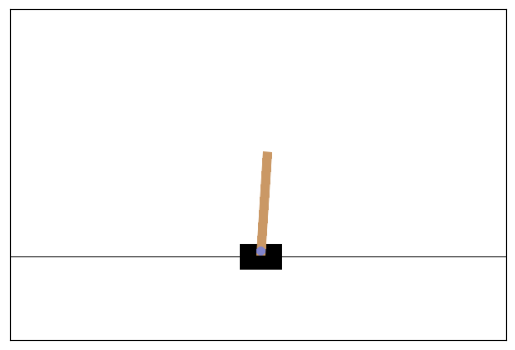

In [9]:
#!/usr/bin/env python3
import gym
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation

def main():
    env = gym.make('CartPole-v1')

    images = [] # 描画のための記述
    ax = plt.gca() # 描画をきれいにするための記述
    ax.axes.xaxis.set_visible(False) # 描画をきれいにするための記述
    ax.axes.yaxis.set_visible(False) # 描画をきれいにするための記述
    observation = env.reset()
    for _ in range(100):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)

        image = plt.imshow(env.render(mode="rgb_array")) # 描画のための記述
        images.append([image]) # 描画のための記述

        if done: env.reset()

    generatedAnimation = animation.ArtistAnimation(plt.gcf(), images, interval=15, blit=True) # 描画のための記述
    display.display(display.HTML(generatedAnimation.to_jshtml())) # 描画のための記述

if __name__ == "__main__":
    main()

表示された動画を確認するとわかるように，このゲームは車の上に棒が設置されているもので，その棒が倒れないように車をうまく動かすというものです．次に，もう 1 個の描画方法を紹介します．以下のように書きます．

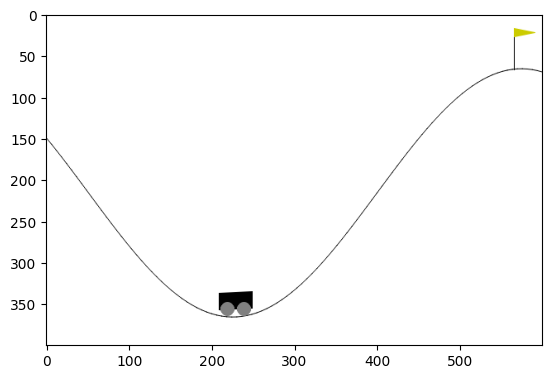

In [10]:
#!/usr/bin/env python3
import gym
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation

def main():
    env = gym.make("MountainCar-v0")

    images = [] # 描画のための記述
    observation = env.reset()
    for _ in range(100):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)

        display.clear_output(wait=True) # 描画のための記述
        images.append(env.render(mode="rgb_array")) # 描画のための記述

        if done: env.reset()

    plt.figure() # 描画のための記述
    moment = plt.imshow(images[0]) # 描画のための記述
    def update(i):
        moment.set_data(images[i])
    generatedAnimation = animation.FuncAnimation(plt.gcf(), update, frames=len(images), interval=50) # 描画のための記述
    display.display(display.HTML(generatedAnimation.to_jshtml())) # 描画のための記述

if __name__ == "__main__":
    main()

### 環境遷移の画像化

上のプログラムでは動画をグーグルコラボラトリー上で表示しましたが，次のプログラムを実行すると動画を GIF ファイルとして保存することができます．画像の保存方法も 2 個紹介しますが，その 1 個目です．グーグルコラボラトリーの左にあるサイドバー上のフォルダのアイコンをクリックすると保存されたファイルを確認することができます．そのファイル名をダブルクリックすると画面右に動画が表示されます．

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initiali

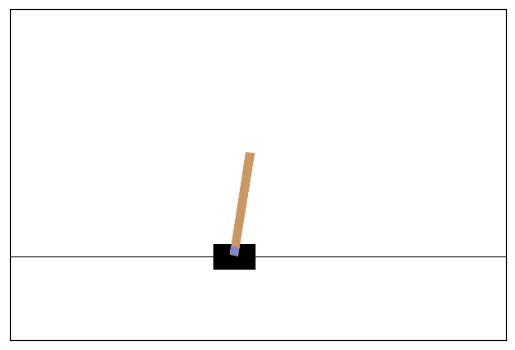

In [11]:
#!/usr/bin/env python3
import gym
import matplotlib.pyplot as plt
from matplotlib import animation

def main():
    env = gym.make('CartPole-v1')

    images = []
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    observation = env.reset()
    for _ in range(100):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)

        image = plt.imshow(env.render(mode="rgb_array"))
        images.append([image])

        if done: env.reset()

    generatedAnimation = animation.ArtistAnimation(plt.gcf(), images, interval=15, blit=True)
    generatedAnimation.save("cartpole-01.gif", writer="pillow", fps=50) # ここだけ変化．

if __name__ == "__main__":
    main()

もう 1 個の画像の生成方法です．以下のようなプログラムを実行します．

In [12]:
#!/usr/bin/env python3
import gym
import imageio

def main():
    env = gym.make("MountainCar-v0")

    images = []
    observation = env.reset()
    for _ in range(100):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)

        images.append(env.render(mode="rgb_array"))

        if done: env.reset()

    imageio.mimsave("cartpole-02.gif", images, "GIF", **{'duration': 1/50})

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initiali

## 深層 Q 学習

Q 学習に深層学習法を利用した深層 Q 学習という方法を紹介します．

### 深層学習と Q 学習

上の節で紹介した Q 学習法は環境（や行動）のサイズが大きくなるととても大きな計算時間が必要となります．すべての場合における Q テーブルを作成するからです．それを避けるために，Q テーブルを深層学習法を用いて近似しようという試みがありますが，それが深層 Q 学習法です．英語だと Deep Q Network（DQN）と言います．

### 教師データ

深層 Q 学習は Q テーブルをニューラルネットワークによって近似する方法です．よって計算の過程でニューラルネットワークを成長させます．どうやって成長させるかですが，実はとても言い難いことなのですが，実は，そのニューラルネットワークは教師あり学習法によって成長させられます．

Q 値の更新式を再掲します．更新された Q 値を $Q'$，環境遷移前の Q 値を $Q$，状態を $s$，行動を $a$，獲得した報酬を $r$，環境遷移後の状態を $s'$，環境遷移後にとり得る行動を $a'$ と書きます．

$
\displaystyle Q'(s,a)=Q(s,a)+\alpha(r+\gamma\max Q(s',a')-Q(s,a))
$

これにたいしてニューラルネットワークの学習に用いる教師データは $r+\gamma\max Q(s',a')$ の部分です．停止条件に到達した場合は，$s'$ も $a'$ もないので，$r$ のみが教師データになります．深層 Q 学習に登場するニューラルネットワークはこの教師データと同じような出力ができるように成長します．

```{note}
強化学習なのに教師あり学習．不思議ですね．摩訶不思議です．
```

### 計算の概要

深層 Q 学習がどのように計算されるかについて紹介します．エージェントは 2 個のニューラルネットワークを持ちます．ひとつは Q ネットワークと呼ばれるもので，もうひとつはターゲットネットワークと呼ばれるものです．Q ネットワークは Q 値を学習するためのネットワークです．学習の最中にもニューラルネットワークによって Q 値は常に計算され続けるのですが，その計算にこのネットワークを使うのは良くなさそうです．なぜなら，報酬を教師データとしてその都度成長させられるネットワークを使って，別の状態における Q 値を計算しようとすると，常に別の条件（パラメータ）によって Q 値を計算してしまうからです．よって，パラメータ更新の頻度が少ない別のネットワークを利用して Q 値を計算しますが，それがターゲットネットワークです．

1.   環境の初期化をする．
2.   エージェントによる行動選択をする．このときのネットワークにはターゲットネットワークを利用する．
3.   環境を進めて状態を得る．また，状態を経験バッファ（後で説明）に溜める．
4.   経験バッファに溜めたデータを用いて Q ネットワークを学習させる．
5.   停止条件に達したら環境を停止．
6.   ターゲットネットワークの更新（Q ネットワークのパラメータに同期）．
7.   上の 1 から 6 を繰り返す．

実際の実装においては，性能を向上させるためのいくつかのテクニックを利用します．次の項でそれらを紹介します．

```{note}
学習の過程で Q ネットワークは状態の遷移が起こる度にパラメータの更新がされます．最終的な価値を得るのではなく即時的な報酬を得る度に更新されるということです．そうではなくてエピソードが終了して価値の計算が終わってはじめて，その情報に基づいてエージェントを成長させたいということが開発者のやりたいことです．ターゲットネットワークはその情報に基づいて学習が行われるネットワークです．
```

### 性能向上テクニック

前述のように**ターゲットネットワークの利用**をすることで常にパラメータが成長させられる Q ネットワークによって Q 値を生成するという不安定さを関係することができます．ターゲットネットワークの構造は Q ネットワークと完全に一致します．

**経験再生法**（**Experience Replay**）は強化学習の最中にミニバッチ学習法を利用すための方法です．環境を進めることで，状態やそのときの行動や停止判定の情報を得ることができますが，その都度にネットワークのパラメータを更新するのではなく，ある一定の情報（経験）が収集された時点ではじめて学習を行う方法です．この経験をどれだけ蓄積するかはハイパーパラメータです．その経験を溜めるものを経験バッファと呼びます．以下のコードでは最大で 512 個の経験を溜めます．新しい経験を記憶した時点で古い記憶を消します．

イプシロングリーディ法はイプシロンの確率でエージェントにランダムな行動を選択させる方法ですが，この**イプシロンの減衰**をさせることで学習を経るにつれてランダムな行動を減らすという戦略をとることがあります．

### 取り組む問題

この節では上の節で紹介した CartPole というゲームを解きます．台車の上に設置されている棒が倒れないように台車を動かすゲームです．エージェントが選択できる行動は「台車を右に動かす」または「台車を左に動かす」の 2 個です．環境を進めることで得られる状態は前述のように「台車の位置」，「台車の速さ」，「棒の角度」，「棒の角速度」の 4 個です．ゲームの停止条件は「棒の角度が 12 度，または，-12 度より大きく，または，小さくなったとき」，「台車の位置がディスプレイの端に位置（2.4 または -2.4）したとき」，「500 単位時間ゲームが続いたとき」です．

### 深層 Q 学習法の実装

この問題を解決するために以下のような深層 Q 学習法の実装コードを実行します．少々行儀が悪いのですが，強化学習が終わった直後にテストを行ってその様子を可視化します．

In [ ]:
#!/usr/bin/env python3
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation
import tensorflow as tf
import random
import numpy as np
from collections import deque
import gym
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

def main():
    # ハイパーパラメータの設定．
    epsilon = 0.3 # イプシロングリーディ法のハイパーパラメータ．
    epsilonDecayRate = 0.99 # イプシロンの値を学習が進むにつれて小さくするための値．
    minimumEpsilon = 0.06 # イプシロンの値はこの値以上は維持する．
    gamma = 0.9
    replaySize = 512 # 記憶を溜めるサイズ．
    minibatchSize = 32
    middleUnitSize = 128
    dropoutRate = 0.2

    # 環境の生成．
    env = gym.make("CartPole-v1")
    env.seed(0) # 再現性確保のため乱数の種は絶対に指定する．

    # 環境情報の取得．
    actionShape = env.action_space.n # ニューラルネットワークの出力サイズを指定するため取得．
    observationShape = env.observation_space.shape # ニューラルネットワークの入力サイズを指定するため取得．

    # リプレイバッファの生成．
    experiences = deque(maxlen=replaySize) # 記憶を溜めるためのリスト．

    # エージェントの生成．
    agent = Agent(epsilon, epsilonDecayRate, minimumEpsilon, gamma, actionShape, observationShape, middleUnitSize, minibatchSize, dropoutRate)

    for episode in range(1, 200+1):
        observation = env.reset()
        rewards, costs = [], [] # エピソード毎に報酬とニューラルネットワークの学習コストを溜めるリスト．
        while True:
            action = agent.act(observation) # エージェントによる行動の選択．これはターゲットネットワークによる選択．
            newObservation, reward, done, _ = env.step(action) # 環境を進める．
            rewards.append(reward)
            experiences.append({"observation": observation, "action": action, "reward": reward, "newObservation": newObservation, "done": done}) # 経験を蓄積．
            observation = newObservation
            if len(experiences) >= minibatchSize: # ミニバッチのサイズに達するまで経験がたまったらニューラルネットワークの学習を開始する．
                cost = agent.learn(experiences) # Qネットワーク（qModel）の学習．
                costs.append(cost)
            if done: break
        if len(experiences) >= minibatchSize:
            agent.update() # エピソードの最後にターゲットネットワーク（targetModel）の更新．
        print("Episode: {:3d}, Number of steps: {:3d}, Mean reward: {:3.1f}, Cost: {:5.3f}".format(episode, len(rewards), np.mean(rewards), np.mean(costs)))

    # 以下はテスト結果を可視化するため．
    observation = env.reset()
    done = False
    frame = plt.imshow(env.render("rgb_array"))
    frames = [[frame]]
    while not done:
        action = agent.act(observation)
        observation, reward, done, _ = env.step(action)
        frame = plt.imshow(env.render(mode="rgb_array")) # 描画のための記述
        frames.append([frame])
    generatedAnimation = animation.ArtistAnimation(plt.gcf(), frames, interval=15, blit=True) # 描画のための記述
    display.display(display.HTML(generatedAnimation.to_jshtml())) # 描画のための記述
    generatedAnimation.save("cartpole-01.gif", writer="pillow", fps=50)

class Agent:
    def __init__(self, epsilon=0.3, epsilonDecayRate=0.99, minimumEpsilon=0.06, gamma=0.9, actionShape=None, observationShape=None, middleUnitSize=16, minibatchSize=32, dropoutRate=0.5):
        self.epsilon = epsilon
        self.epsilonDecayRate = epsilonDecayRate
        self.minimumEpsilon = minimumEpsilon
        self.gamma = gamma
        self.actionShape = actionShape
        self.observationShape = observationShape
        self.qModel = Network(middleUnitSize, self.actionShape, dropoutRate) # Q値をその都度学習するためのネットワーク．
        self.targetModel = Network(middleUnitSize, self.actionShape, dropoutRate) # Q値を計算するためのネットワーク．エピソードが終わる度にQネットワークと同じパラメータに同期される．
        self.minibatchSize = minibatchSize
        self.mseComputer = tf.keras.losses.MeanSquaredError() # Q値は右に動かすか左に動かすかの値なのでそれと同じになるように二乗誤差をコストとする．元の論文だとフーバーロスを利用．
        self.optimizer = tf.keras.optimizers.Adam()

    # 以下の関数はイプシロングリーディ法を利用して行動を選択する関数．
    def act(self, observation):
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(self.actionShape) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.targetModel(observation.reshape(1,-1), False)[0].numpy()) # 最もQ値が高い行動を選択．予測はターゲットネットワークで行う．
        self.epsilonDecay() # イプシロンの値を少しずつ小さくする．
        return action

    # 以下の関数はイプシロンを少しずつ小さくするためのもの．
    def epsilonDecay(self):
        self.epsilon = self.epsilon * self.epsilonDecayRate
        if self.epsilon < self.minimumEpsilon:
            self.epsilon = self.minimumEpsilon

    @tf.function
    def run(self, tx, tt, flag):
        with tf.GradientTape() as tape:
            self.qModel.trainable = flag # ここで学習させるのはQネットワークの方なのでQネットワークの記述．
            ty = self.qModel.call(tx, flag)
            costvalue=self.mseComputer(tt, ty) # コストを計算．
        gradient = tape.gradient(costvalue, self.qModel.trainable_variables) # 勾配の計算．
        self.optimizer.apply_gradients(zip(gradient, self.qModel.trainable_variables)) # 最適化．
        return costvalue

    # 以下の関数はQネットワークの学習のため．
    def learn(self, experiences):
        instances = random.sample(experiences, self.minibatchSize) # リプレイバッファからミニバッチサイズ分のデータを抽出．
        observationInstances = np.asarray([instance["observation"] for instance in instances]) # ニューラルネットワークの入力値を取り出しているだけ．
        qValues = self.targetModel(observationInstances, False).numpy() # Q値を計算（Q値を格納するための変数を作っただけ）．
        newObservationInstances = np.asarray([instance["newObservation"] for instance in instances]) # ニューラルネットワークの入力値を取り出しているだけ．
        newQValues = self.targetModel(newObservationInstances, False).numpy() # Q値を計算．
        # 以下のforは教師データを作成するための記述．
        for i, instance in enumerate(instances):
            action = instance["action"]
            reward = instance["reward"]
            if instance["done"]:
                qValues[i][action] = reward
            else:
                qValues[i][action] = reward + self.gamma * np.max(newQValues[i])
        learncostvalue = self.run(observationInstances, qValues, True)
        return learncostvalue

    # 以下の関数はターゲットネットワークの更新（Qネットワークと同じにすること）のため．
    def update(self):
        self.targetModel.set_weights(self.qModel.get_weights())

class Network(tf.keras.Model):
    def __init__(self, middleUnitSize, outputSize, dropoutRate):
        super(Network, self).__init__()
        self.w1 = tf.keras.layers.Dense(middleUnitSize)
        self.w2 = tf.keras.layers.Dense(middleUnitSize)
        self.w3 = tf.keras.layers.Dense(outputSize)
        self.a1 = tf.keras.layers.LeakyReLU()
        self.dropout = tf.keras.layers.Dropout(dropoutRate)
    def call(self, x, learningFlag):
        y = self.w1(x)
        y = self.a1(y)
        y = self.dropout(y, training=learningFlag)
        y = self.w2(y)
        y = self.a1(y)
        y = self.dropout(y, training=learningFlag)
        y = self.w3(y)
        return y

if __name__ == "__main__":
    main()

実行した結果，エピソードに対して，ゲームを継続することができたステップ数，エピソード毎の平均報酬とニューラルネットワークのコストが出力されました．ステップ数は学習を経るにつれて増えていると思います．また，平均報酬は常に `1.0` となっているはずです．ゲーム終了までの間，1 単位時間ゲームを継続すると報酬が 1 ポイントもらえるというシステムなので，平均報酬は `1.0` となるのです．また，テストを実行した結果すると棒が倒れずに維持される動画を確認できると思います．GPU の利用や乱数の種の状況によっては異なる結果が得られているかもしれません．

<img src="https://github.com/yamada-kd/introduction-to-artificial-intelligence/blob/main/image/cartpole.gif?raw=1" />


以下の部分ではハイパーパラメータを設定します．

```python
    # ハイパーパラメータの設定．
    epsilon = 0.3 # イプシロングリーディ法のハイパーパラメータ．
    epsilonDecayRate = 0.99 # イプシロンの値を学習が進むにつれて小さくするための値．
    minimumEpsilon = 0.06 # イプシロンの値はこの値以上は維持する．
    gamma = 0.9
    replaySize = 512 # 記憶を溜めるサイズ．
    minibatchSize = 32
    middleUnitSize = 128
    dropoutRate = 0.2
```

以下の部分では環境を静止して，環境の情報を取得して，経験バッファを生成します．再現性確保のために乱数の種は指定すべきです．

```python
    # 環境の生成．
    env = gym.make("CartPole-v1")
    env.seed(0) # 再現性確保のため乱数の種は絶対に指定する．
    
    # 環境情報の取得．
    actionShape = env.action_space.n # ニューラルネットワークの出力サイズを指定するため取得．
    observationShape = env.observation_space.shape # ニューラルネットワークの入力サイズを指定するため取得．
    
    # リプレイバッファの生成．
    experiences = deque(maxlen=replaySize) # 記憶を溜めるためのリスト．
```

```{note}
何をするにしても乱数の種は絶対に指定しましょう．
```

以下の部分はエージェントを生成するためのものです．

```python
    # エージェントの生成．
    agent = Agent(epsilon, epsilonDecayRate, minimumEpsilon, gamma, actionShape, observationShape, middleUnitSize, minibatchSize, dropoutRate)
```

エージェントはクラス `Agent` によって生成されますが，これについて説明します．以下の部分でこのクラスで利用する変数等を生成します．ネットワークは Q ネットワークとターゲットネットワークの 2 個を生成します．

```python
    def __init__(self, epsilon=0.3, epsilonDecayRate=0.99, minimumEpsilon=0.06, gamma=0.9, actionShape=None, observationShape=None, middleUnitSize=16, minibatchSize=32, dropoutRate=0.5):
        self.epsilon = epsilon
        self.epsilonDecayRate = epsilonDecayRate
        self.minimumEpsilon = minimumEpsilon
        self.gamma = gamma
        self.actionShape = actionShape
        self.observationShape = observationShape
        self.qModel = Network(middleUnitSize, self.actionShape, dropoutRate) # Q値をその都度学習するためのネットワーク．
        self.targetModel = Network(middleUnitSize, self.actionShape, dropoutRate) # Q値を計算するためのネットワーク．エピソードが終わる度にQネットワークと同じパラメータに同期される．
        self.minibatchSize = minibatchSize
        self.mseComputer = tf.keras.losses.MeanSquaredError() # Q値は右に動かすか左に動かすかの値なのでそれと同じになるように二乗誤差をコストとする．元の論文だとフーバーロスを利用．
        self.optimizer = tf.keras.optimizers.Adam()
```

以下の部分はイプシロングリーディ法の記述ですが，このコードにおいてはイプシロン減衰も行うのでその記述もあります．

```python
    # 以下の関数はイプシロングリーディ法を利用して行動を選択する関数．
    def act(self, observation):
        if np.random.uniform() < self.epsilon:
            action = np.random.randint(self.actionShape) # イプシロンの確率でランダムに行動する．
        else:
            action = np.argmax(self.targetModel(observation.reshape(1,-1), False)[0].numpy()) # 最もQ値が高い行動を選択．予測はターゲットネットワークで行う．
        self.epsilonDecay() # イプシロンの値を少しずつ小さくする．
        return action
    
    # 以下の関数はイプシロンを少しずつ小さくするためのもの．
    def epsilonDecay(self):
        self.epsilon = self.epsilon * self.epsilonDecayRate
        if self.epsilon < self.minimumEpsilon:
            self.epsilon = self.minimumEpsilon
```

以下の部分は Subclassing API のいつもの記述です．注意すべき点は，これで学習させられるネットワークは Q ネットワークの方であるということです．

```python
    @tf.function
    def run(self, tx, tt, flag):
        with tf.GradientTape() as tape:
            self.qModel.trainable = flag # ここで学習させるのはQネットワークの方なのでQネットワークの記述．
            ty = self.qModel.call(tx, flag)
            costvalue=self.mseComputer(tt, ty) # コストを計算．
        gradient = tape.gradient(costvalue, self.qModel.trainable_variables) # 勾配の計算．
        self.optimizer.apply_gradients(zip(gradient, self.qModel.trainable_variables)) # 最適化．
        return costvalue
```

以下の記述は Q ネットワークのパラメータ更新のための記述です．経験バッファからミニバッチサイズ分のインスタンスを取り出し，そこから状態と次の状態を抽出し，それに対してターゲットネットワークを利用して Q 値を計算します．その Q 値を教師データとして Q ネットワークを学習させます．

```python
    # 以下の関数はQネットワークの学習のため．
    def learn(self, experiences):
        instances = random.sample(experiences, self.minibatchSize) # リプレイバッファからミニバッチサイズ分のデータを抽出．
        observationInstances = np.asarray([instance["observation"] for instance in instances]) # ニューラルネットワークの入力値を取り出しているだけ．
        qValues = self.targetModel(observationInstances, False).numpy() # Q値を計算（Q値を格納するための変数を作っただけ）．
        newObservationInstances = np.asarray([instance["newObservation"] for instance in instances]) # ニューラルネットワークの入力値を取り出しているだけ．
        newQValues = self.targetModel(newObservationInstances, False).numpy() # Q値を計算．
        # 以下のforは教師データを作成するための記述．
        for i, instance in enumerate(instances):
            action = instance["action"]
            reward = instance["reward"]
            if instance["done"]:
                qValues[i][action] = reward
            else:
                qValues[i][action] = reward + self.gamma * np.max(newQValues[i])
        learncostvalue = self.run(observationInstances, qValues, True)
        return learncostvalue
```

以下の記述はターゲットネットワークを更新するためのものです．ターゲットネットワークの更新方法は，Q ネットワークのパラメータをそのまま利用するハードアップデートと一部を利用するソフトアップデートがあるのですが，ここではハードアップデートを利用しました．

```python
    # 以下の関数はターゲットネットワークの更新（Qネットワークと同じにすること）のため．
    def update(self):
        self.targetModel.set_weights(self.qModel.get_weights())
```

さらに，`main()` に戻って以下の記述ですが，これが強化学習を進めるためのものです．環境をリセットして，エージェントによる行動の選択，経験バッファに経験を溜めて，Q ネットワークを学習，エピソード終了後にターゲットネットワークを更新します．特に難しいところはないように思います．

```python
    for episode in range(1, 100+1):
        observation = env.reset()
        rewards, costs = [], [] # エピソード毎に報酬とニューラルネットワークの学習コストを溜めるリスト．
        while True:
            action = agent.act(observation) # エージェントによる行動の選択．これはターゲットネットワークによる選択．
            newObservation, reward, done, _ = env.step(action) # 環境を進める．
            rewards.append(reward)
            experiences.append({"observation": observation, "action": action, "reward": reward, "newObservation": newObservation, "done": done}) # 経験を蓄積．
            observation = newObservation
            if len(experiences) >= minibatchSize: # ミニバッチのサイズに達するまで経験がたまったらニューラルネットワークの学習を開始する．
                cost = agent.learn(experiences) # Qネットワーク（qModel）の学習．
                costs.append(cost)
            if done: break
        if len(experiences) >= minibatchSize:
            agent.update() # エピソードの最後にターゲットネットワーク（targetModel）の更新．
        print("Episode: {:3d}, Number of steps: {:3d}, Mean reward: {:3.1f}, Cost: {:5.3f}".format(episode, len(rewards), np.mean(rewards), np.mean(costs)))
```

最後の以下の部分はテスト結果を可視化するための記述です．本来は学習とテストのコードは分けた方が良いです．

```python
    # 以下はテスト結果を可視化するため．
    observation = env.reset()
    done = False
    frame = plt.imshow(env.render("rgb_array"))
    frames = [[frame]]
    while not done:
        action = agent.act(observation)
        observation, reward, done, _ = env.step(action)
        frame = plt.imshow(env.render(mode="rgb_array")) # 描画のための記述
        frames.append([frame])
    generatedAnimation = animation.ArtistAnimation(plt.gcf(), frames, interval=15, blit=True) # 描画のための記述
    display.display(display.HTML(generatedAnimation.to_jshtml())) # 描画のための記述
    generatedAnimation.save("cartpole-01.gif", writer="pillow", fps=50)
```

```{note}
終わりです．
```